<a href="https://colab.research.google.com/github/vabAmmoIsHere/Q-Amodel/blob/main/statisticsQ%26AModelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cleaning the data is the first phase in your data modeling and training

In [15]:
import pandas as pd
import numpy as np
import spacy
from spacy.lang.en.stop_words import STOP_WORDS as stop

In [16]:
# loading data in a data frame 
# upload your raw training data into colab then store it in a data frame
df = pd.read_csv("/training_data.csv", encoding='latin1')


In [17]:
# Viewing data in data frame
print(df)

                                       Tag                                               Text
0                       Stem and Leaf Plot  Stem and Leaf Plot A stem and leaf plot is a w...
1                                Histogram  Histogram A histogram is a way of summarizing ...
2                                  Boxplot  Boxplot A boxplot is a way of summarizing a se...
3                              Scatterplot  Scatterplot A scatterplot is a useful summary ...
4                      Numerical Summaries  Numerical Summaries Mean The sample mean or av...
5                  The Normal Distribution  The Normal Distribution A normal distribution ...
6                         Categorical Data  Categorical Data Categorical variables represe...
7                        Linear Regression  Linear Regression Linear regression attempts t...
8                              Correlation  Correlation The strength of the linear associa...
9           Inference in Linear Regression  Inference in Lin

In [18]:
# few more stats that are important in nlp 
# word_count: 
df['word_count'] = df['Text'].apply(lambda x: len(str(x).split()))

In [19]:
# let's view a randomly selected sample dataset and the word_count
df.sample(12)

,Tag,Text,word_count
6,Categorical Data,Categorical Data Categorical variables represe...,756
16,Conditional Probability,Conditional Probability The conditional probab...,688
9,Inference in Linear Regression,Inference in Linear Regression Linear regressi...,1521
2,Boxplot,Boxplot A boxplot is a way of summarizing a se...,258
25,Chi-Square Goodness of Fit Test,Chi-Square Goodness of Fit Test When an analys...,2941
18,Mean and Variance of Random Variables,Mean and Variance of Random Variables Mean The...,1129
26,Two-Way Tables and the Chi-Square Test,Two-Way Tables and the Chi-Square Test When an...,980
8,Correlation,Correlation The strength of the linear associa...,321
3,Scatterplot,Scatterplot A scatterplot is a useful summary ...,350
4,Numerical Summaries,Numerical Summaries Mean The sample mean or av...,855


In [20]:
# maximum words in a cell (statistics chapter) and # minimum words in a cell 
max = df['word_count'].max()
min = df['word_count'].min()
print('maximun words in a chapter: ', max, '\n\nminimum words in a chapter: ', min)

maximun words in a chapter:  2947 

minimum words in a chapter:  258


In [21]:
# char counts in each cell
def char_count(text: str):
  s = text.split()
  new_text = ''.join(s)
  return len(new_text)

print('no of characters: ', char_count('random writing to count characters in a text'))

no of characters:  37


In [23]:
# characters in each chapters
df['char_count'] = df['Text'].apply(lambda x: char_count(str(x)))
df.sample(12)

,Tag,Text,word_count,char_count
18,Mean and Variance of Random Variables,Mean and Variance of Random Variables Mean The...,1129,4901
1,Histogram,Histogram A histogram is a way of summarizing ...,305,1386
19,The Binomial Distribution,The Binomial Distribution In many cases it is ...,1289,5901
16,Conditional Probability,Conditional Probability The conditional probab...,688,3343
26,Two-Way Tables and the Chi-Square Test,Two-Way Tables and the Chi-Square Test When an...,980,5083
21,Confidence Intervals,Confidence Intervals In statistical inference ...,1302,6142
9,Inference in Linear Regression,Inference in Linear Regression Linear regressi...,1521,6941
2,Boxplot,Boxplot A boxplot is a way of summarizing a se...,258,1278
24,Inference for Categorical Data,Inference for Categorical Data The analysis of...,1271,5853
23,Comparison of Two Means,Comparison of Two Means In many cases a resear...,993,4650


In [24]:
df['avg_word_length'] = df['char_count']/df['word_count']
df.sample(25)

,Tag,Text,word_count,char_count,avg_word_length
2,Boxplot,Boxplot A boxplot is a way of summarizing a se...,258,1278,4.953488
19,The Binomial Distribution,The Binomial Distribution In many cases it is ...,1289,5901,4.577967
1,Histogram,Histogram A histogram is a way of summarizing ...,305,1386,4.544262
13,Sampling,Sampling Since it is generally impossible to s...,612,3148,5.143791
8,Correlation,Correlation The strength of the linear associa...,321,1755,5.467290
6,Categorical Data,Categorical Data Categorical variables represe...,756,3811,5.041005
10,Multiple Linear Regression,Multiple Linear Regression Multiple linear reg...,1091,5237,4.800183
21,Confidence Intervals,Confidence Intervals In statistical inference ...,1302,6142,4.717358
7,Linear Regression,Linear Regression Linear regression attempts t...,1087,5527,5.084637
24,Inference for Categorical Data,Inference for Categorical Data The analysis of...,1271,5853,4.605035


In [25]:
# stop words
# calling stopword function from spacy(imported earlier)-stopwords identified by spacy
print(stop) 
print(len(stop))

{'an', 'along', 'should', 'fifty', 'anywhere', 'whereby', 'whole', 'something', 'someone', 'beyond', 'about', 'another', 'also', 'whence', 'might', 'those', 'twenty', 'some', 'few', 'yours', "'ve", 'the', 'both', 'has', 'noone', 'nor', '‘m', 'this', 'than', 'nevertheless', 'toward', 'now', 'again', 'else', 'using', "'d", 'whose', 'many', 'me', 'former', 'front', 'make', '’m', "'s", 'which', 'by', 'everywhere', 'rather', 'whither', 'became', 'onto', 'seemed', 'perhaps', 'may', 'sometimes', 'except', 'why', 'two', 'otherwise', 'while', 'as', 'how', 'somehow', 'together', 'seem', 'various', 'before', 'more', 'three', 'put', 'of', 'therein', 'hereby', 'behind', 'anyway', 'becomes', 'one', 'twelve', 'their', 'others', 'regarding', 'there', 'themselves', 'yourself', '‘re', 'done', 'on', 'whoever', 'did', 'cannot', 'if', 'i', 'have', '’ll', 'beside', 'whom', 'his', 'side', 'indeed', 'through', 'unless', 'to', 'above', '’re', 'too', 'with', 'off', 're', 'almost', 'doing', 'because', 'over', 't

In [26]:
# check for no. stopwords in our text
df['stop_words_len'] = df['Text'].apply(lambda x: len([t for t in x.split() if t in stop]))
df.sample(12)

,Tag,Text,word_count,char_count,avg_word_length,stop_words_len
7,Linear Regression,Linear Regression Linear regression attempts t...,1087,5527,5.084637,499
23,Comparison of Two Means,Comparison of Two Means In many cases a resear...,993,4650,4.682779,352
25,Chi-Square Goodness of Fit Test,Chi-Square Goodness of Fit Test When an analys...,2941,9295,3.160490,585
2,Boxplot,Boxplot A boxplot is a way of summarizing a se...,258,1278,4.953488,105
1,Histogram,Histogram A histogram is a way of summarizing ...,305,1386,4.544262,102
13,Sampling,Sampling Since it is generally impossible to s...,612,3148,5.143791,272
15,Probability Models,Probability Models A probability model is a ma...,1648,7145,4.335558,725
22,Tests of Significance,Tests of Significance Once sample data has bee...,2947,13756,4.667798,1167
10,Multiple Linear Regression,Multiple Linear Regression Multiple linear reg...,1091,5237,4.800183,384
26,Two-Way Tables and the Chi-Square Test,Two-Way Tables and the Chi-Square Test When an...,980,5083,5.186735,346


In [28]:
df['no_of_digits'] = df['Text'].apply(lambda x: len([t for t in x.split() if t.isdigit()]))
df.sample(25)

,Tag,Text,word_count,char_count,avg_word_length,stop_words_len,no_of_digits
26,Two-Way Tables and the Chi-Square Test,Two-Way Tables and the Chi-Square Test When an...,980,5083,5.186735,346,0
8,Correlation,Correlation The strength of the linear associa...,321,1755,5.467290,144,0
24,Inference for Categorical Data,Inference for Categorical Data The analysis of...,1271,5853,4.605035,441,0
19,The Binomial Distribution,The Binomial Distribution In many cases it is ...,1289,5901,4.577967,523,0
12,Experimentation,Experimentation An experiment deliberately imp...,1312,6914,5.269817,592,0
5,The Normal Distribution,The Normal Distribution A normal distribution ...,918,4391,4.783224,365,0
21,Confidence Intervals,Confidence Intervals In statistical inference ...,1302,6142,4.717358,467,0
4,Numerical Summaries,Numerical Summaries Mean The sample mean or av...,855,3774,4.414035,355,0
6,Categorical Data,Categorical Data Categorical variables represe...,756,3811,5.041005,255,0
1,Histogram,Histogram A histogram is a way of summarizing ...,305,1386,4.544262,102,0


In [29]:
# remove special characters
import re
df['Text'] = df['Text'].apply(lambda x: re.sub(r'[^\w ]+', "", x))
df.sample(20)

,Tag,Text,word_count,char_count,avg_word_length,stop_words_len,no_of_digits
12,Experimentation,Experimentation An experiment deliberately imp...,1312,6914,5.269817,592,0
10,Multiple Linear Regression,Multiple Linear Regression Multiple linear reg...,1091,5237,4.800183,384,0
25,Chi-Square Goodness of Fit Test,ChiSquare Goodness of Fit Test When an analyst...,2941,9295,3.160490,585,0
26,Two-Way Tables and the Chi-Square Test,TwoWay Tables and the ChiSquare Test When anal...,980,5083,5.186735,346,0
8,Correlation,Correlation The strength of the linear associa...,321,1755,5.467290,144,0
24,Inference for Categorical Data,Inference for Categorical Data The analysis of...,1271,5853,4.605035,441,0
17,Random Variables,Random Variables A random variable usually wri...,1034,4690,4.535783,408,0
2,Boxplot,Boxplot A boxplot is a way of summarizing a se...,258,1278,4.953488,105,0
14,Sampling in Statistical Inference,Sampling in Statistical Inference The use of r...,470,2420,5.148936,219,0
15,Probability Models,Probability Models A probability model is a ma...,1648,7145,4.335558,725,0


In [30]:
# removing extra spaces
df['Text'] = df['Text'].apply(lambda x: ' '.join(x.split()))
df.sample(10)

,Tag,Text,word_count,char_count,avg_word_length,stop_words_len,no_of_digits
13,Sampling,Sampling Since it is generally impossible to s...,612,3148,5.143791,272,0
24,Inference for Categorical Data,Inference for Categorical Data The analysis of...,1271,5853,4.605035,441,0
20,Sample Means,Sample Means The sample mean from a group of o...,769,3543,4.607282,274,0
17,Random Variables,Random Variables A random variable usually wri...,1034,4690,4.535783,408,0
12,Experimentation,Experimentation An experiment deliberately imp...,1312,6914,5.269817,592,0
5,The Normal Distribution,The Normal Distribution A normal distribution ...,918,4391,4.783224,365,0
1,Histogram,Histogram A histogram is a way of summarizing ...,305,1386,4.544262,102,0
23,Comparison of Two Means,Comparison of Two Means In many cases a resear...,993,4650,4.682779,352,0
14,Sampling in Statistical Inference,Sampling in Statistical Inference The use of r...,470,2420,5.148936,219,0
3,Scatterplot,Scatterplot A scatterplot is a useful summary ...,350,1967,5.620000,137,0


In [31]:
! pip install bs4
from bs4 import BeautifulSoup

df['Text'] = df['Text'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text().strip())
df.sample(12)

,Tag,Text,word_count,char_count,avg_word_length,stop_words_len,no_of_digits
9,Inference in Linear Regression,Inference in Linear Regression Linear regressi...,1521,6941,4.563445,542,0
17,Random Variables,Random Variables A random variable usually wri...,1034,4690,4.535783,408,0
6,Categorical Data,Categorical Data Categorical variables represe...,756,3811,5.041005,255,0
14,Sampling in Statistical Inference,Sampling in Statistical Inference The use of r...,470,2420,5.148936,219,0
7,Linear Regression,Linear Regression Linear regression attempts t...,1087,5527,5.084637,499,0
19,The Binomial Distribution,The Binomial Distribution In many cases it is ...,1289,5901,4.577967,523,0
21,Confidence Intervals,Confidence Intervals In statistical inference ...,1302,6142,4.717358,467,0
13,Sampling,Sampling Since it is generally impossible to s...,612,3148,5.143791,272,0
11,ANOVA for Regression,ANOVA for Regression Analysis of Variance ANOV...,1158,5477,4.729706,391,0
1,Histogram,Histogram A histogram is a way of summarizing ...,305,1386,4.544262,102,0


In [32]:
# remove accented characters
import unicodedata

def remove_accented_data(text: str):
  text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
  return text

df['Text'] = df['Text'].apply(lambda x: remove_accented_data(x))
df.sample(20)



,Tag,Text,word_count,char_count,avg_word_length,stop_words_len,no_of_digits
22,Tests of Significance,Tests of Significance Once sample data has bee...,2947,13756,4.667798,1167,0
5,The Normal Distribution,The Normal Distribution A normal distribution ...,918,4391,4.783224,365,0
16,Conditional Probability,Conditional Probability The conditional probab...,688,3343,4.859012,262,0
13,Sampling,Sampling Since it is generally impossible to s...,612,3148,5.143791,272,0
15,Probability Models,Probability Models A probability model is a ma...,1648,7145,4.335558,725,0
12,Experimentation,Experimentation An experiment deliberately imp...,1312,6914,5.269817,592,0
7,Linear Regression,Linear Regression Linear regression attempts t...,1087,5527,5.084637,499,0
0,Stem and Leaf Plot,Stem and Leaf Plot A stem and leaf plot is a w...,366,1734,4.737705,151,0
8,Correlation,Correlation The strength of the linear associa...,321,1755,5.467290,144,0
25,Chi-Square Goodness of Fit Test,ChiSquare Goodness of Fit Test When an analyst...,2941,9295,3.160490,585,0


In [34]:
# removing stop words
df['Text'] = df['Text'].apply(lambda x: ' '.join([t for t in x.split() if t not in stop]))
df.sample(20)

,Tag,Text,word_count,char_count,avg_word_length,stop_words_len,no_of_digits
17,Random Variables,Random Variables A random variable usually wri...,1034,4690,4.535783,408,0
23,Comparison of Two Means,Comparison Two Means In cases researcher inter...,993,4650,4.682779,352,0
21,Confidence Intervals,Confidence Intervals In statistical inference ...,1302,6142,4.717358,467,0
20,Sample Means,Sample Means The sample mean group observation...,769,3543,4.607282,274,0
3,Scatterplot,Scatterplot A scatterplot useful summary set b...,350,1967,5.620000,137,0
15,Probability Models,Probability Models A probability model mathema...,1648,7145,4.335558,725,0
13,Sampling,Sampling Since generally impossible study enti...,612,3148,5.143791,272,0
12,Experimentation,Experimentation An experiment deliberately imp...,1312,6914,5.269817,592,0
10,Multiple Linear Regression,Multiple Linear Regression Multiple linear reg...,1091,5237,4.800183,384,0
22,Tests of Significance,Tests Significance Once sample data gathered o...,2947,13756,4.667798,1167,0


In [38]:
! python -m spacy download "en_core_web_lg"

     |████████████████████████████████| 827.9 MB 1.2 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [58]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [59]:
import spacy
import en_core_web_lg
# 
# nlp = spacy.load('en_core_web_lg') ==== this didn't work for me
nlp = en_core_web_lg.load() # this did


def make_to_base(x):

  x = str(x)
  x_list = []
  doc = nlp(x)
  for token in doc:
    lemma = token.lemma_
    if lemma == '-PRON-' or lemma == 'be':
      lemma = token.text
    x_list.append(lemma)
  return ' '.join(x_list)

df['Text'] = df['Text'].apply(lambda x: make_to_base(x))


In [51]:
df.sample(25)

,Tag,Text,word_count,char_count,avg_word_length,stop_words_len,no_of_digits
6,Categorical Data,Categorical Data Categorical variable represen...,756,3811,5.041005,255,0
16,Conditional Probability,Conditional Probability the conditional probab...,688,3343,4.859012,262,0
7,Linear Regression,Linear regression Linear regression attempt mo...,1087,5527,5.084637,499,0
8,Correlation,Correlation the strength linear association va...,321,1755,5.467290,144,0
1,Histogram,Histogram a histogram way summarize datum meas...,305,1386,4.544262,102,0
0,Stem and Leaf Plot,stem leaf Plot a stem leaf plot way summarize ...,366,1734,4.737705,151,0
22,Tests of Significance,test significance once sample datum gather obs...,2947,13756,4.667798,1167,0
21,Confidence Intervals,confidence interval in statistical inference w...,1302,6142,4.717358,467,0
24,Inference for Categorical Data,Inference Categorical Data the analysis catego...,1271,5853,4.605035,441,0
15,Probability Models,Probability Models a probability model mathema...,1648,7145,4.335558,725,0


In [52]:
! pip install wordcloud

length of text:  102797


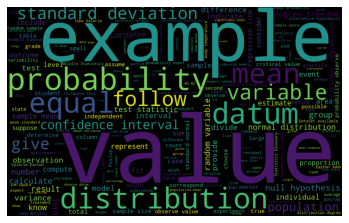

In [55]:
# visualizing data 

from wordcloud import WordCloud
import matplotlib.pyplot as plt

%matplotlib inline

# converting dataframe to string
text = ' '.join(df['Text'])

# length of text
print('length of text: ', len(text))

# wordcloud
wc = WordCloud(width=1600, height=1000).generate(text)
plt.imshow(wc)
plt.axis('off')
plt.show()


In [56]:
# correcting the spelling errors

! pip install -U textblob

In [57]:
! python -m textblob.download_corpora

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.
